In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [2]:
#Importing data
TrainingData = pd.read_csv("Google_Stock_Price_Train.csv")
#Getting the Opening prices
TrainingSet = TrainingData.iloc[:, 1:2].values
TrainingData.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [3]:
#Opening price scaling
SC = MinMaxScaler()
ScaledTrainingSet = SC.fit_transform(TrainingSet)

In [4]:
#Creating the data structure for the RNN, we choose the last sixty days for the RNN
NumberOfTimeSteps = 60
X_Train = []
y_Train = []

for i in range(NumberOfTimeSteps, ScaledTrainingSet.size):
    X_Train.append(ScaledTrainingSet[i-NumberOfTimeSteps:i, 0])
    y_Train.append(ScaledTrainingSet[i, 0])
    
#Creating numpy arrays
X_Train, y_Train = np.array(X_Train), np.array(y_Train)

#Reshaping the arrays
Shape = (X_Train.shape[0], X_Train.shape[1], 1)
X_Train = np.reshape(X_Train, Shape)

In [5]:
#Getting the test data
TestData = pd.read_csv("Google_Stock_Price_Test.csv")
TestSet = TestData.iloc[:, 1:2].values

#Getting the predicted stock prices of Jan 2017. Do not change the test value scalings and do not change the test scaling.
AdditionOfDataSets = pd.concat((TrainingData['Open'], TestData['Open']), axis=0) #Vertical axis
CutData_ = AdditionOfDataSets.values
CutData = CutData_.reshape(-1, 1)
CutData = SC.transform(CutData)
X_Test = []

for i in range(len(TrainingData), CutData.size):
    X_Test.append(CutData[i-NumberOfTimeSteps:i, 0])
X_Test = np.array(X_Test)
Shape = (X_Test.shape[0], X_Test.shape[1], 1)
X_Test = np.reshape(X_Test, Shape)

In [6]:
#Creating the RNN with a dropout rate
DropoutRate = 0.2
Units = 20
def CreateRegressor():
    Regressor = Sequential()
    Regressor.add(LSTM(units=Units, return_sequences=True, input_shape = (X_Train.shape[1], 1)))
    Regressor.add(Dropout(DropoutRate))
    Regressor.add(LSTM(units=Units, return_sequences=True))
    Regressor.add(Dropout(DropoutRate))
    Regressor.add(LSTM(units=Units, return_sequences=True))
    Regressor.add(Dropout(DropoutRate))
    Regressor.add(LSTM(units=Units))
    Regressor.add(Dropout(DropoutRate))
    Regressor.add(Dense(units=1))
    
    return Regressor

In [7]:
#Initialization of the RNN
Reg = CreateRegressor()
Reg.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [8]:
#Training
Hist = Reg.fit(X_Train, y_Train, epochs = 100, batch_size = 32, verbose = 1, validation_split = 0.2, shuffle = True)

Train on 958 samples, validate on 240 samples
Epoch 1/100
958/958 [==============================] - 18s 19ms/step - loss: 0.0757 - val_loss: 0.0991
Epoch 2/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0129 - val_loss: 0.0023
Epoch 3/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0067 - val_loss: 0.0025
Epoch 4/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0072 - val_loss: 0.0043
Epoch 5/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0067 - val_loss: 0.0022
Epoch 6/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0061 - val_loss: 0.0021
Epoch 7/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0055 - val_loss: 0.0029
Epoch 8/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0060 - val_loss: 0.0039
Epoch 9/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0057 - val_loss: 0.0034
Epoch 10/100
958/958 [=====

958/958 [==============================] - 17s 18ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 80/100
958/958 [==============================] - 17s 17ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 81/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 82/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 83/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 84/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 85/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 86/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 87/100
958/958 [==============================] - 17s 18ms/step - loss: 0.0021 - val_loss: 0.0061
Epoch 88/100
958/958 [==============================] - 17s 18ms/step - loss:

In [11]:
Prediction = Reg.predict(X_Test)
Prediction = SC.inverse_transform(Prediction)

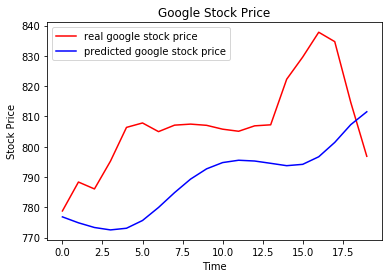

In [12]:
plt.plot(TestSet, color='r', label="real google stock price")
plt.plot(Prediction, color='b', label="predicted google stock price")
plt.title("Google Stock Price")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()